In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
import scipy.stats as stats 
from scipy.stats import mode

# Suppress warnings
import warnings 
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, accuracy_score, auc, precision_recall_curve, average_precision_score

# Machine learning models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb

# Visualization of feature importances
from yellowbrick.model_selection import FeatureImportances

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('../data/datasets_inter/data_inter.csv')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 150000 rows dan 28 columns.



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.000000,Scientist,19114.120000,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.000000,11.270000,4.000000,NaN,809.980000,26.822620,265.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.000000,Scientist,19114.120000,NaN,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",-1,NaN,11.270000,4.000000,Good,809.980000,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.000000,Scientist,19114.120000,NaN,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.000000,NaN,4.000000,Good,809.980000,28.609352,267.000000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.000000,Scientist,19114.120000,NaN,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",5,4.000000,6.270000,4.000000,Good,809.980000,31.377862,268.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.000000,Scientist,19114.120000,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",6,NaN,11.270000,4.000000,Good,809.980000,24.797347,269.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df = df.drop('Name', axis=1)

In [5]:
label_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

nan_counts = df[label_cols].isnull().sum()
print(nan_counts)

Occupation               10500
Type_of_Loan             17112
Credit_Mix               30000
Payment_of_Min_Amount        0
Payment_Behaviour        11400
dtype: int64


In [6]:
for col in label_cols:
    mode_value = df[col].mode()[0] 
    df[col].fillna(mode_value, inplace=True) 

In [7]:
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
# Vérification après encodage
print("DataFrame après encodage avec LabelEncoder:")
df.head()

DataFrame après encodage avec LabelEncoder:


,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23,821000265.000000,12,19114.120000,1824.843333,3,4,3,4,135,3,7.000000,11.270000,4.000000,2,809.980000,26.822620,265.000000,1,49.574949,80.415295,2,312.494089,Good
1,5635,3392,2,23,821000265.000000,12,19114.120000,NaN,3,4,3,4,135,-1,NaN,11.270000,4.000000,1,809.980000,31.944960,NaN,1,49.574949,118.280222,3,284.629162,Good
2,5636,3392,3,-500,821000265.000000,12,19114.120000,NaN,3,4,3,4,135,3,7.000000,NaN,4.000000,1,809.980000,28.609352,267.000000,1,49.574949,81.699521,4,331.209863,Good
3,5637,3392,4,23,821000265.000000,12,19114.120000,NaN,3,4,3,4,135,5,4.000000,6.270000,4.000000,1,809.980000,31.377862,268.000000,1,49.574949,199.458074,5,223.451310,Good
4,5638,3392,5,23,821000265.000000,12,19114.120000,1824.843333,3,4,3,4,135,6,NaN,11.270000,4.000000,1,809.980000,24.797347,269.000000,1,49.574949,41.420153,1,341.489231,Good


In [9]:
print('Missing values status:', df.isnull().values.any())

percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_dataframe = pd.DataFrame({'data type':dtypes,'%': percent_mv})
mv_dataframe.sort_values('%', ascending=False, inplace=True)
mv_dataframe 

Missing values status: True


,data type,%
Credit_Score,object,33.333333
Monthly_Inhand_Salary,float64,15.000000
Credit_History_Age,float64,9.000000
Num_of_Delayed_Payment,float64,7.000000
SSN,float64,5.600000
Amount_invested_monthly,float64,4.500000
Changed_Credit_Limit,float64,2.100000
Num_Credit_Inquiries,float64,2.000000
Monthly_Balance,float64,1.174667
Month,int64,0.000000


In [10]:
def impute_all_missing_values(data):
    """
    Impute missing values for numeric columns using decision trees (excluding categorical columns and 'Credit_Score').
    """
    # Identify the numeric columns with missing values (exclude 'Credit_Score' column)
    numeric_columns_with_missing_values = data.select_dtypes(include=['number']).columns
    numeric_columns_with_missing_values = [col for col in numeric_columns_with_missing_values if data[col].isnull().any() and col != 'Credit_Score']

    # For each numeric column with missing values
    for column in numeric_columns_with_missing_values:
        print(f"Imputing missing values for column: {column}")

        # Create a temporary DataFrame without missing values in the relevant column
        temp_df = data.dropna(subset=[column])
        
        # Separate features (X) and target (y) for imputation
        features = [col for col in temp_df.columns if col != column and data[col].dtype != 'object']  # Exclude categorical features
        X = temp_df[features]
        y = temp_df[column]

        # Use a regression model for numeric columns
        model = DecisionTreeRegressor(random_state=42)

        # Train the model with non-missing data
        model.fit(X, y)
        
        # Identify indices with missing values in the column
        missing_values_index = data[data[column].isnull()].index
        
        # Select features for rows with missing values
        X_missing = data.loc[missing_values_index, features]
        
        # Predict the missing values and impute them in the column
        imputed_values = model.predict(X_missing)
        data.loc[missing_values_index, column] = imputed_values

    print("Imputation complete.")
    print(data.isnull().sum())

In [11]:
impute_all_missing_values(df)

Imputing missing values for column: SSN
Imputing missing values for column: Monthly_Inhand_Salary
Imputing missing values for column: Num_of_Delayed_Payment
Imputing missing values for column: Changed_Credit_Limit
Imputing missing values for column: Num_Credit_Inquiries
Imputing missing values for column: Credit_History_Age
Imputing missing values for column: Amount_invested_monthly
Imputing missing values for column: Monthly_Balance
Imputation complete.
ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit           

In [12]:
print('Missing values status:', df.isnull().values.any())

percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_dataframe = pd.DataFrame({'data type':dtypes,'%': percent_mv})
mv_dataframe.sort_values('%', ascending=False, inplace=True)
mv_dataframe 

Missing values status: True


,data type,%
Credit_Score,object,33.333333
Customer_ID,int64,0.000000
ID,int64,0.000000
Age,int64,0.000000
SSN,float64,0.000000
Occupation,int64,0.000000
Annual_Income,float64,0.000000
Monthly_Inhand_Salary,float64,0.000000
Num_Bank_Accounts,int64,0.000000
Num_Credit_Card,int64,0.000000


In [13]:
def get_iqr_bounds_all_columns(df, multiply=1.5):
    """
    Calcule les bornes basées sur l'IQR pour toutes les colonnes numériques 
    et identifie les valeurs aberrantes.

    Parameters:
        df (pd.DataFrame): Le DataFrame d'entrée
        multiply (float): Facteur pour multiplier l'IQR (par défaut : 1.5)

    Returns:
        dict: Un dictionnaire contenant les bornes pour chaque colonne
    """
    iqr_bounds = {}  # Pour stocker les bornes de chaque colonne
    numeric_cols = df.select_dtypes(include='number').columns  # Colonnes numériques

    for column in numeric_cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - iqr * multiply
        upper = q3 + iqr * multiply

        # Compte des valeurs aberrantes
        outliers = df[(df[column] < lower) | (df[column] > upper)].shape[0]

        print(f"Colonne: {column} | Outliers: {outliers} | Lower: {lower} | Upper: {upper}")
        iqr_bounds[column] = {"lower": lower, "upper": upper, "outliers": outliers}

    return iqr_bounds

iqr_results = get_iqr_bounds_all_columns(df)
print(iqr_results)

Colonne: ID | Outliers: 0 | Lower: -69365.5 | Upper: 230632.5
Colonne: Customer_ID | Outliers: 0 | Lower: -23416.25 | Upper: 75465.75
Colonne: Month | Outliers: 0 | Lower: -4.5 | Upper: 17.5
Colonne: Age | Outliers: 4184 | Lower: -0.5 | Upper: 67.5
Colonne: SSN | Outliers: 0 | Lower: -521269031.25 | Upper: 1522588518.75
Colonne: Occupation | Outliers: 0 | Lower: -5.0 | Upper: 19.0
Colonne: Annual_Income | Outliers: 4165 | Lower: -60556.63249999999 | Upper: 152809.0275
Colonne: Monthly_Inhand_Salary | Outliers: 3043 | Lower: -4861.811666666668 | Upper: 12438.468333333334
Colonne: Num_Bank_Accounts | Outliers: 1950 | Lower: -3.0 | Upper: 13.0
Colonne: Num_Credit_Card | Outliers: 3450 | Lower: -0.5 | Upper: 11.5
Colonne: Interest_Rate | Outliers: 3000 | Lower: -10.0 | Upper: 38.0
Colonne: Num_of_Loan | Outliers: 6580 | Lower: -5.0 | Upper: 11.0
Colonne: Type_of_Loan | Outliers: 0 | Lower: -2420.5 | Upper: 8593.5
Colonne: Delay_from_due_date | Outliers: 5998 | Lower: -17.0 | Upper: 55.0
Co

In [14]:
outlier_boundaries = {
    'Age': {'lower': 14, 'upper': 56},
    'Annual_Income': {'lower': 0, 'upper': 1000000},
    'Monthly_Inhand_Salary': {'lower': 0, 'upper': 50000},
    'Num_Bank_Accounts': {'lower': -1.0, 'upper': 11.0},
    'Num_Credit_Card': {'lower': 0, 'upper': 11},
    'Interest_Rate': {'lower': 1.0, 'upper': 34.0},
    'Num_of_Loan': {'lower': 0.0, 'upper': 9.0},
    'Delay_from_due_date': {'lower': -1.0, 'upper': 62.0},
    'Num_of_Delayed_Payment': {'lower': -2.0, 'upper': 25.0},
    'Changed_Credit_Limit': {'lower': 0.5, 'upper': 29.98},
    'Num_Credit_Inquiries': {'lower': 0.0, 'upper': 18.0},
    'Outstanding_Debt': {'lower': 0.23, 'upper': 4998.07},
    'Total_EMI_per_month': {'lower': 0.0, 'upper': 1779.1032538262775},
    'Amount_invested_monthly': {'lower': 0.0, 'upper': 10000.0},
    'Monthly_Balance': {'lower': -10000, 'upper': 10000},
}

def handle_outliers(df, method='capping'):
    for column in df.columns:
        if column in outlier_boundaries:
            lower = outlier_boundaries[column]['lower']
            upper = outlier_boundaries[column]['upper']
            
            if method == 'capping':
                df[column] = np.where(df[column] < lower, lower, df[column])
                df[column] = np.where(df[column] > upper, upper, df[column])
    return df

handle_outliers(df, method='capping')


df.head()


,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23,821000265.000000,12,19114.120000,1824.843333,3.000000,4,3.000000,4.000000,135,3.000000,7.000000,11.270000,4.000000,2,809.980000,26.822620,265.000000,1,49.574949,80.415295,2,312.494089,Good
1,5635,3392,2,23,821000265.000000,12,19114.120000,1584.788750,3.000000,4,3.000000,4.000000,135,-1.000000,5.000000,11.270000,4.000000,1,809.980000,31.944960,265.000000,1,49.574949,118.280222,3,284.629162,Good
2,5636,3392,3,14,821000265.000000,12,19114.120000,1583.388333,3.000000,4,3.000000,4.000000,135,3.000000,7.000000,9.270000,4.000000,1,809.980000,28.609352,267.000000,1,49.574949,81.699521,4,331.209863,Good
3,5637,3392,4,23,821000265.000000,12,19114.120000,1569.508750,3.000000,4,3.000000,4.000000,135,5.000000,4.000000,6.270000,4.000000,1,809.980000,31.377862,268.000000,1,49.574949,199.458074,5,223.451310,Good
4,5638,3392,5,23,821000265.000000,12,19114.120000,1824.843333,3.000000,4,3.000000,4.000000,135,6.000000,0.000000,11.270000,4.000000,1,809.980000,24.797347,269.000000,1,49.574949,41.420153,1,341.489231,Good


In [15]:
df[df['Num_Bank_Accounts']<0].head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,51128,20266,3,39,807035415.000000,4,128305.760000,10434.146667,-1.000000,6,1.000000,2.000000,381,5.000000,3.000000,9.490000,6.000000,1,1151.700000,40.586736,269.000000,1,196.587321,230.922386,0,855.904960,Standard
30331,51129,20266,4,40,807035415.000000,4,128305.760000,10434.146667,-1.000000,6,1.000000,2.000000,381,5.000000,6.000000,14.490000,6.000000,1,1151.700000,39.369401,270.000000,1,196.587321,524.304418,3,592.522928,Good
30332,51130,20266,5,40,807035415.000000,4,128305.760000,10434.146667,-1.000000,6,1.000000,2.000000,381,1.000000,8.000000,9.490000,6.000000,1,1151.700000,28.702053,271.000000,1,196.587321,150.096675,0,936.730670,Good
30333,51131,20266,6,40,807035415.000000,4,128305.760000,10434.146667,-1.000000,6,1.000000,2.000000,381,5.000000,6.000000,9.490000,6.000000,1,1151.700000,34.808390,272.000000,1,196.587321,1006.698069,4,120.129276,Good
30334,51132,20266,7,40,807035415.000000,4,128305.760000,10434.146667,-1.000000,6,1.000000,2.000000,381,9.000000,3.000000,9.490000,6.000000,1,1151.700000,35.206427,284.000000,1,1779.103254,172.992021,0,913.835324,Good


In [16]:
df[df['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([20266, 43128, 17340, 22931])

In [17]:
df.loc[df['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [18]:
df[df['Delay_from_due_date']<0].head(20)

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,5635,3392,2,23,821000265.000000,12,19114.120000,1584.788750,3.000000,4,3.000000,4.000000,135,-1.000000,5.000000,11.270000,4.000000,1,809.980000,31.944960,265.000000,1,49.574949,118.280222,3,284.629162,Good
49,5707,10314,2,34,411510676.000000,7,131313.400000,11242.783333,0.000000,1,8.000000,2.000000,1013,-1.000000,2.000000,15.340000,4.000000,1,352.160000,31.983710,368.000000,1,137.644605,698.873271,2,547.760457,Good
74,5744,47624,3,44,366681681.000000,6,31370.800000,2825.233333,1.000000,6,12.000000,2.000000,3912,-1.000000,0.000000,1.760000,5.000000,1,421.430000,31.046418,319.000000,1,46.616129,140.820696,4,375.086508,Good
78,5748,47624,7,45,366681681.000000,6,31370.800000,2825.233333,1.000000,6,12.000000,0.000000,3912,-1.000000,2.000000,5.760000,5.000000,1,421.430000,22.762202,323.000000,1,46.616129,188.394900,5,337.512304,Good
79,5749,47624,8,45,366681681.000000,6,31370.800000,2825.233333,1.000000,6,12.000000,2.000000,3912,-1.000000,2.000000,5.760000,5.000000,2,421.430000,37.565053,324.000000,1,46.616129,252.644827,5,273.262377,Good
88,5766,49323,1,32,342902649.000000,4,88640.240000,7266.686667,3.000000,6,1.000000,2.000000,4646,-1.000000,0.000000,3.510000,3.000000,1,950.360000,28.210617,305.000000,1,135.173371,98.931764,0,732.563532,Standard
95,5773,49323,8,33,342902649.000000,4,88640.240000,7266.686667,3.000000,6,1.000000,2.000000,4646,-1.000000,2.000000,3.510000,3.000000,1,950.360000,30.870799,312.000000,1,135.173371,98.441951,0,733.053344,Good
700,6682,29152,5,28,330960638.000000,9,15398.950000,1548.245833,1.000000,7,5.000000,4.000000,5936,-1.000000,0.000000,8.410000,8.000000,1,343.840000,30.973025,343.000000,0,34.813970,123.416843,5,286.593770,Standard
1143,7345,8970,8,48,902996202.000000,7,28587.290000,2621.274167,4.000000,1,7.000000,0.000000,3463,-1.000000,2.000000,1.220000,1.000000,1,1496.380000,28.106119,297.000000,1,0.000000,123.202563,3,408.924854,Good
1234,7484,6806,3,50,405795399.000000,10,28681.380000,2127.115000,3.000000,5,2.000000,0.000000,3463,-1.000000,5.000000,2.820000,4.000000,1,467.640000,25.393540,229.000000,1,0.000000,183.976225,4,308.735275,Good


In [19]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [20]:
df[df['Num_of_Delayed_Payment']<0].head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,5648,8625,3,28,4075839.000000,13,34847.840000,3037.986667,2.000000,11,6.000000,1.000000,684,3.000000,-1.000000,5.420000,2.000000,2,605.030000,33.224951,321.000000,1,18.816215,58.515976,0,466.466476,Standard
698,6680,29152,3,28,330960638.000000,9,15398.950000,1325.955000,1.000000,7,5.000000,4.000000,5936,1.000000,-1.000000,8.410000,3.000000,1,343.840000,33.494442,341.000000,0,34.813970,47.607470,1,322.403143,Standard
1253,7511,12757,6,49,325078725.000000,3,1000000.000000,1649.957500,0.000000,4,4.000000,0.000000,3463,1.000000,-2.000000,1.380000,4.000000,1,1287.590000,30.801079,307.000000,0,0.000000,97.705452,5,319.668590,Standard
1561,7975,45940,2,56,946089738.000000,1,30922.280000,2494.856667,1.000000,5,12.000000,2.000000,5890,14.000000,-2.000000,11.710000,2.000000,1,957.530000,39.135924,256.000000,1,30.338204,159.523585,3,329.623877,Poor
2167,8881,10251,8,27,434178443.000000,0,34841.870000,3025.489167,1.000000,7,1.000000,2.000000,4145,1.000000,-1.000000,2.240000,6.000000,2,142.050000,38.351183,374.000000,1,33.366098,174.874086,4,374.308732,Standard


In [21]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [22]:
df[df['Monthly_Balance']<0].head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,13951,39045,2,17,186499679.000000,2,41086.400000,3660.866667,3.000000,4,6.000000,7.000000,2529,10.000000,17.000000,17.860000,10.000000,2,113.980000,34.826541,138.000000,2,145.544320,201.142993,4,-10000.000000,Standard
26177,44899,23184,2,45,264531943.000000,4,29728.310000,2551.359167,3.000000,4,6.000000,2.000000,6191,15.000000,0.000000,7.810000,3.000000,1,917.000000,38.198076,381.000000,1,34.496445,198.611513,3,-10000.000000,Good
29158,49368,10381,7,55,970198342.000000,7,30748.930000,2572.410833,1.000000,6,12.000000,2.000000,4388,10.000000,3.000000,4.210000,9.000000,1,860.970000,40.634250,233.000000,1,43.727774,79.071807,2,-10000.000000,Standard
35570,58988,34281,3,45,288627562.000000,7,20929.295000,1704.107917,5.000000,3,9.000000,3.000000,6048,14.000000,5.000000,1.990000,4.000000,2,858.090000,33.943626,259.000000,1,1779.103254,220.304552,5,-10000.000000,Standard
38622,63564,11127,7,21,6360111.000000,3,15167.620000,1471.968333,4.000000,5,3.000000,1.000000,684,4.000000,4.000000,10.360000,7.000000,1,847.030000,28.541848,333.000000,0,9.930809,128.875872,5,-10000.000000,Standard


In [23]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = None

<Axes: >

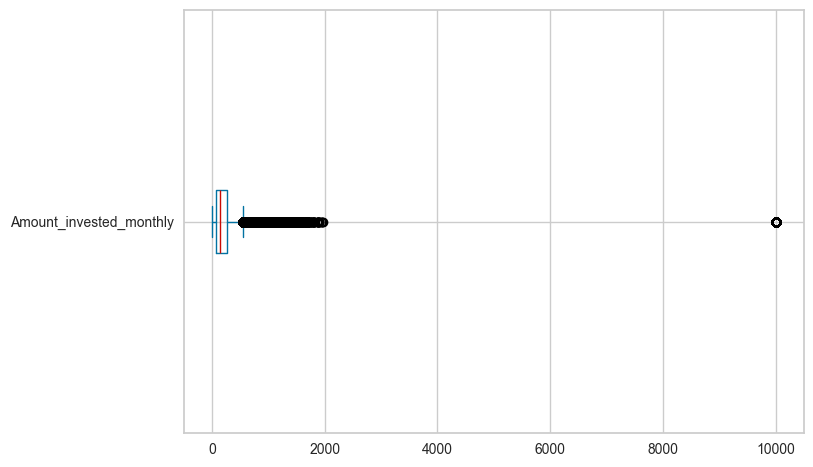

In [24]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [25]:
df.loc[df['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None


<Axes: >

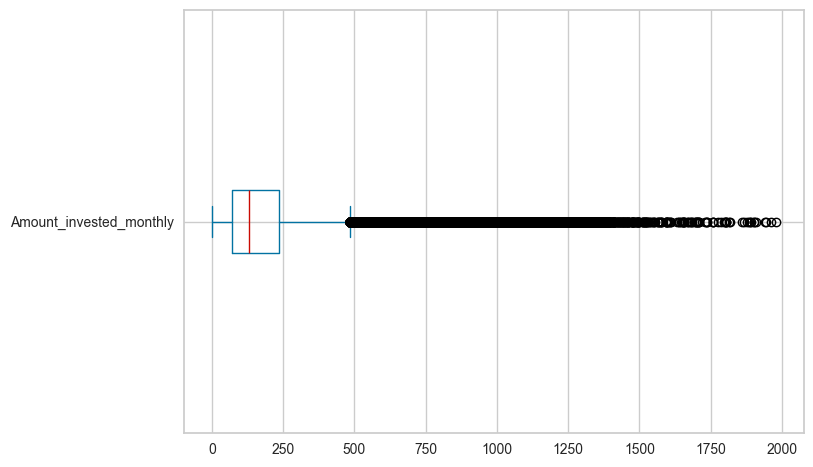

In [26]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [27]:
print('Missing values status:', df.isnull().values.any())

percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_dataframe = pd.DataFrame({'data type':dtypes,'%': percent_mv})
mv_dataframe.sort_values('%', ascending=False, inplace=True)
mv_dataframe 

Missing values status: True


,data type,%
Credit_Score,object,33.333333
Amount_invested_monthly,float64,4.578000
Num_of_Delayed_Payment,float64,0.665333
Delay_from_due_date,float64,0.592667
Monthly_Balance,float64,0.010000
Occupation,int64,0.000000
SSN,float64,0.000000
Age,int64,0.000000
ID,int64,0.000000
Customer_ID,int64,0.000000


In [28]:
impute_all_missing_values(df)

Imputing missing values for column: Delay_from_due_date
Imputing missing values for column: Num_of_Delayed_Payment
Imputing missing values for column: Amount_invested_monthly
Imputing missing values for column: Monthly_Balance
Imputation complete.
ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Tota

In [29]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [30]:
test_df = df[df['Credit_Score'].isna()].drop(columns='Credit_Score')
print('This dataset has %d rows dan %d columns.\n' % test_df.shape)
train_df = df[df['Credit_Score'].notna()]
print('This dataset has %d rows dan %d columns.\n' % train_df.shape)

This dataset has 50000 rows dan 26 columns.

This dataset has 100000 rows dan 27 columns.



In [31]:
df.to_csv('../data/processed/dataset_cleaned.csv', index=False)